In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
from google.colab import files

In [ ]:
files.upload()
with open('20230727_195954_discussion_sharings.json', 'r') as f:
  json_data = json.load(f)

Saving 20230727_195954_discussion_sharings.json to 20230727_195954_discussion_sharings (1).json


In [ ]:
df = pd.DataFrame(json_data['Sources'])

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            32 non-null     object
 1   URL             32 non-null     object
 2   Author          32 non-null     object
 3   RepoName        32 non-null     object
 4   RepoLanguage    27 non-null     object
 5   Number          32 non-null     int64 
 6   Title           32 non-null     object
 7   Body            32 non-null     object
 8   CreatedAt       32 non-null     object
 9   ClosedAt        4 non-null      object
 10  UpdatedAt       32 non-null     object
 11  Closed          32 non-null     bool  
 12  UpvoteCount     32 non-null     int64 
 13  ChatgptSharing  32 non-null     object
dtypes: bool(1), int64(2), object(11)
memory usage: 3.4+ KB


,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,UpdatedAt,Closed,UpvoteCount,ChatgptSharing
0,discussion,https://github.com/orgs/deep-foundation/discus...,FreePhoenix888,deep-foundation/Discussions,None,27,Should we worry about imports perfomance in ha...,My dialogue with chatgpt about it: https://cha...,2023-07-11T11:31:00Z,None,2023-07-12T16:56:49Z,False,1,[{'URL': 'https://chat.openai.com/share/1e0f86...
1,discussion,https://github.com/JushBJJ/Mr.-Ranedeer-AI-Tut...,JushBJJ,JushBJJ/Mr.-Ranedeer-AI-Tutor,None,74,v2.7 - Code Interpreter Exclusive,# Mr. Ranedeer v2.7 - Code Interpreter Exclusi...,2023-07-15T10:58:10Z,None,2023-07-15T17:42:58Z,False,1,[{'URL': 'https://chat.openai.com/share/53b386...
2,discussion,https://github.com/dtch1997/gpt-text-gym/discu...,dtch1997,dtch1997/gpt-text-gym,Python,7,GPT decomposing missions using functions,Message 1: Environment description\r\nMessage ...,2023-06-26T19:30:34Z,None,2023-06-26T19:36:50Z,False,1,[{'URL': 'https://chat.openai.com/share/1ee484...
3,discussion,https://github.com/dave1010/pandora/discussions/6,dave1010,dave1010/pandora,PHP,6,Demo and examples thread. Share what you've do...,## Installing Python and running a new Docker ...,2023-07-02T14:56:52Z,None,2023-07-02T17:07:25Z,False,1,[{'URL': 'https://chat.openai.com/share/771687...
4,discussion,https://github.com/sugi-01096/72/discussions/2,haruto0214,sugi-01096/72,Python,2,a,https://chat.openai.com/share/2859d61a-3454-45...,2023-06-13T09:24:10Z,None,2023-06-23T05:59:32Z,False,1,[{'URL': 'https://chat.openai.com/share/2859d6...


In [ ]:
total_issues = len(df)
closed_issues = df[df['Closed'] == True]
closure_rate = len(closed_issues) / total_issues

In [ ]:
df['CreatedAt'] = pd.to_datetime(df['CreatedAt'])
df['UpdatedAt'] = pd.to_datetime(df['UpdatedAt'])
df['TimeToResolution'] = (df['UpdatedAt'] - df['CreatedAt']).dt.total_seconds()
mean_time_to_resolution = df['TimeToResolution'].mean()
median_time_to_resolution = df['TimeToResolution'].median()

In [ ]:
print(f"Closure Rate: {closure_rate * 100:.2f}%")
print(f"Mean Time to Resolution: {mean_time_to_resolution} seconds")
print(f"Median Time to Resolution: {median_time_to_resolution} seconds")

Closure Rate: 12.50%
Mean Time to Resolution: 4156835.375 seconds
Median Time to Resolution: 47486.5 seconds


In [ ]:
closed_group = df[df['Closed'] == True]['UpvoteCount']
open_group = df[df['Closed'] == False]['UpvoteCount']

t_stat, p_value = stats.ttest_ind(closed_group, open_group, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -1.4357944952010468
P-value: 0.16254603682225335


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


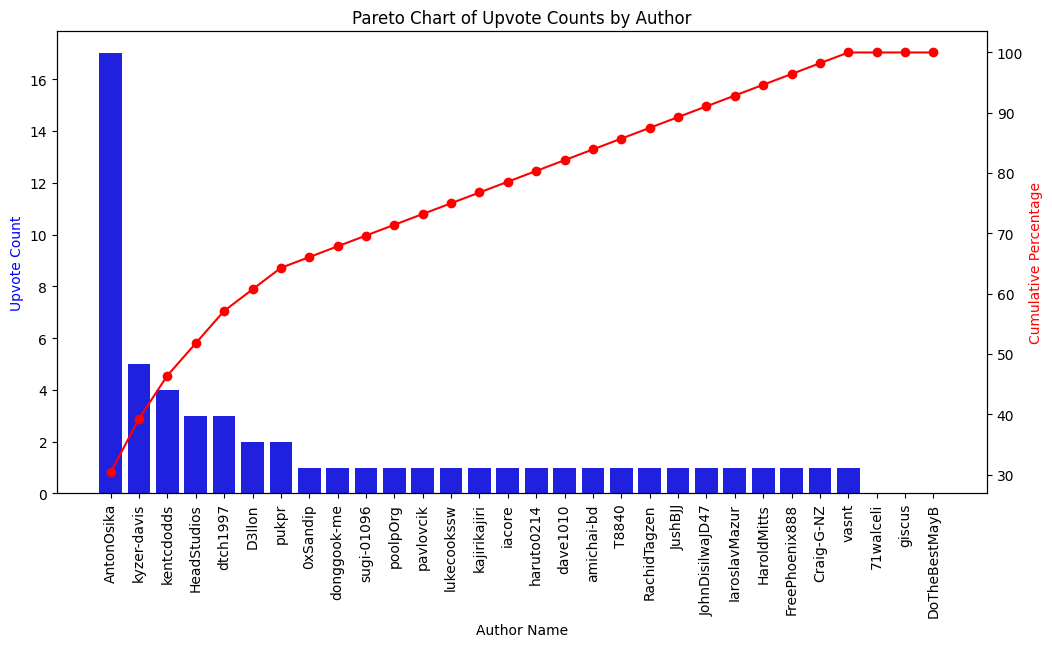

In [ ]:
author_upvotes = df.groupby('Author')['UpvoteCount'].sum().sort_values(ascending=False)
cumulative_upvotes = author_upvotes.cumsum()
total_upvotes = cumulative_upvotes.max()
percentage_upvotes = (cumulative_upvotes / total_upvotes) * 100

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x=author_upvotes.index, y=author_upvotes.values, color='b', ax=ax1)

ax2 = ax1.twinx()
ax2.plot(author_upvotes.index, percentage_upvotes, color='r', marker='o')

ax1.set_xlabel('Author Name')
ax1.set_ylabel('Upvote Count', color='b')
ax2.set_ylabel('Cumulative Percentage', color='r')
plt.title('Pareto Chart of Upvote Counts by Author')
ax1.set_xticklabels(author_upvotes.index, rotation=90)

plt.show()